# Mingjian Shi 
## USC EE660 Final Project 
## Airline Passenger Satisfaction Prediction 

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier


In [2]:
#Load the data

org_data = pd.read_csv('dataset.csv')

#Previwe a few rows of the data:

print('The shape of data is:', org_data.shape)
org_data.head(10)

The shape of data is: (129880, 24)


,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298


### We have 5 catgorical: gender, customer_type, type_of_travel, customer_class, and satisfaction(target)

## 1. Pre-Processing

### 1.1 One-hot Encoding

In [3]:
#drop "Unnamed" col
org_data.drop(["Unnamed: 0"],axis = 1, inplace = True)

#data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
#data['customer_type'] = data['customer_type'].map({'Loyal Customer':1,'disloyal Customer':0})
#data["type_of_travel"] = data["type_of_travel"].map({"Personal Trave": 1, "Business travel":0})
#data.head()


#-------------------------------------------------------------------#

# reference: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/
org_data = pd.get_dummies(org_data, drop_first = True)
org_data.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1


### Changes after hot encoding:

#### Unnamed --> dropped
#### Gender --> Gender_Male[0,1]
#### customer_type --> customer_type_disloyal_Customer [0,1]
#### type_of_travel --> type_of_travel_Personal_Travel [0,1]
#### customer_class --> customer_class_Eco [0, 1]  & customer_class_Eco_Plus [0, 1]
#### satisfaction --> satisfaction_satisfied [0, 1]

### 1.2 Correlation 

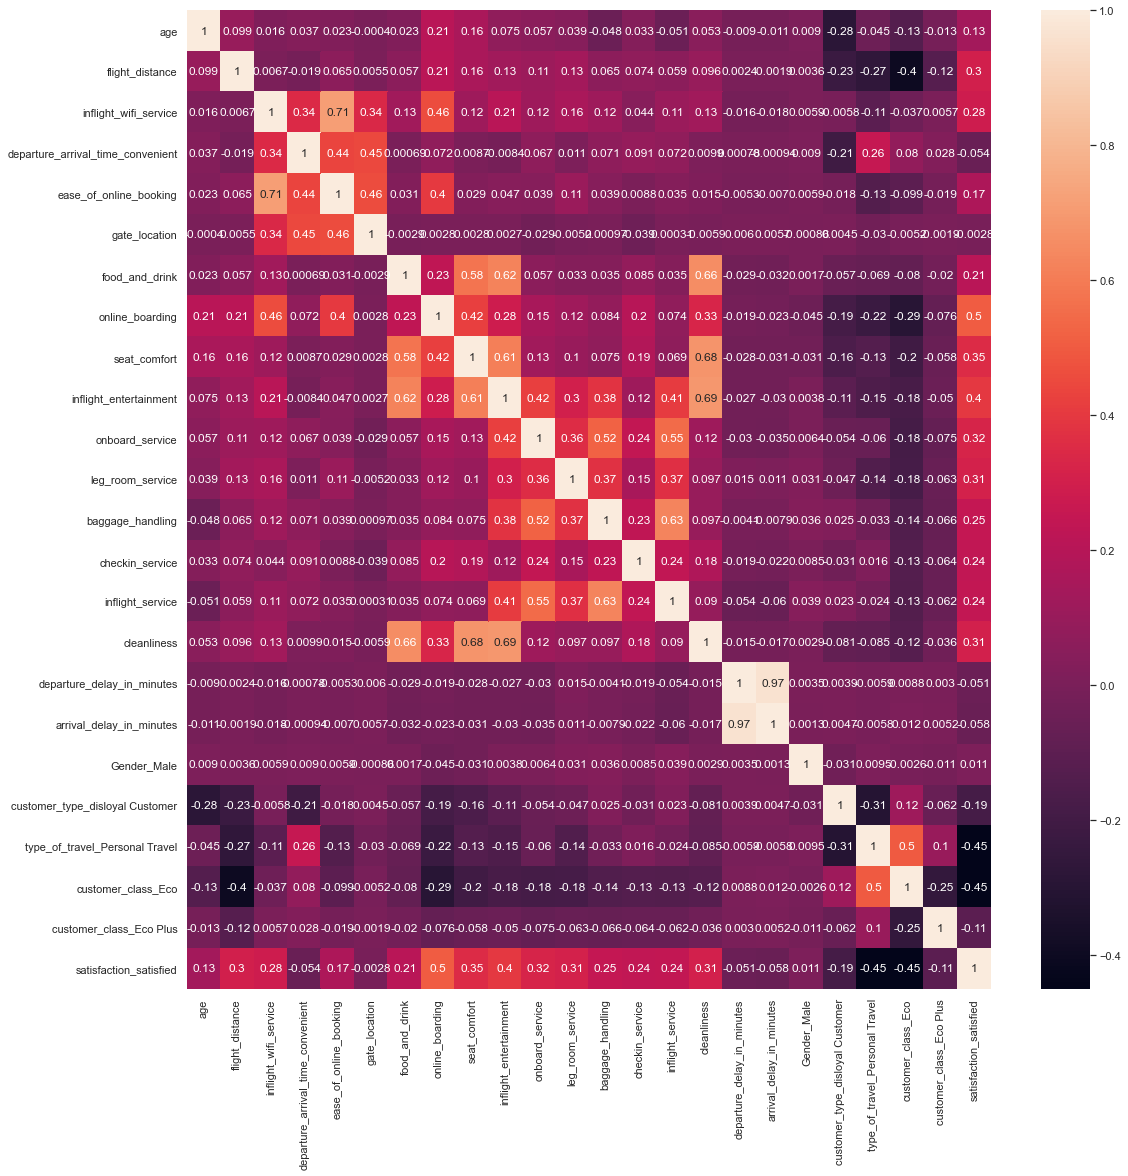

In [26]:
import seaborn
plt.figure(figsize = (18,18))
seaborn.set(font_scale = 1)
seaborn.heatmap(org_data.corr(), annot = True)


### 1.3 Missing data

In [4]:
print(org_data.isnull().sum())

age                                    0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
Gender_Male                            0
customer_type_disloyal Customer        0
type_of_travel_Personal Travel         0
customer_class_Eco                     0
customer_class_Eco Plus                0
satisfaction_satisfied                 0
dtype: int64


#### I found out there are 393 missing data in "arrival_delay_in_minutes". We can delete them.

### Updated method of dealing with missing data:
#### Use fill in option:  we can see from correlation matrix, we have 97% correlation between "departure_delay_in_minutes" and "arrival_delay_in_minutes". Since the missing data is not large, we can use one to fill in another, which called "Imputation"
##### Reference: https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

In [4]:
org_data['arrival_delay_in_minutes'].fillna(org_data['departure_delay_in_minutes'], inplace = True)
print(org_data.isnull().sum())

age                                  0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Gender_Male                          0
customer_type_disloyal Customer      0
type_of_travel_Personal Travel       0
customer_class_Eco                   0
customer_class_Eco Plus              0
satisfaction_satisfied               0
dtype: int64


### 1.4 Take look at each features influence
#### This is to see if some features have more influence on prediction 

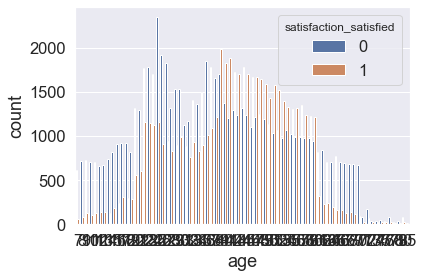

In [6]:

features = []
for col in enumerate(org_data.columns):
    features.append(col[1])
seaborn.set(font_scale = 1.5)
seaborn.countplot(data = org_data, x = features[0], hue='satisfaction_satisfied')


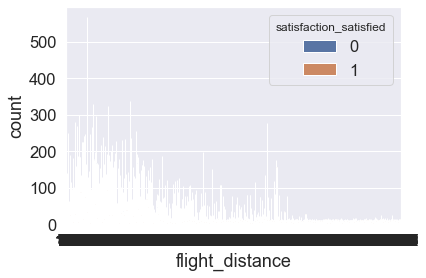

In [112]:
seaborn.countplot(data = org_data, x = features[1], hue='satisfaction_satisfied')

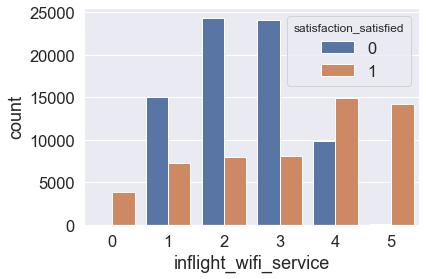

In [113]:
seaborn.countplot(data = org_data, x = features[2], hue='satisfaction_satisfied')

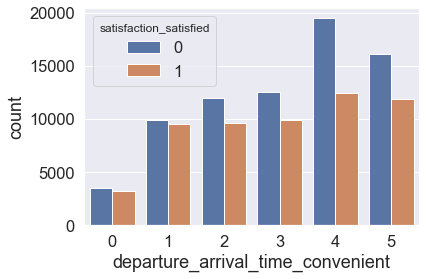

In [114]:
seaborn.countplot(data = org_data, x = features[3], hue='satisfaction_satisfied')

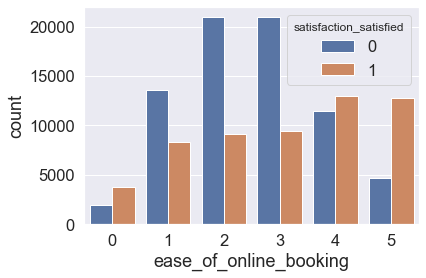

In [115]:
seaborn.countplot(data = org_data, x = features[4], hue='satisfaction_satisfied')

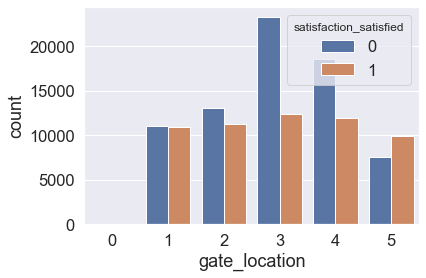

In [116]:
seaborn.countplot(data = org_data, x = features[5], hue='satisfaction_satisfied')

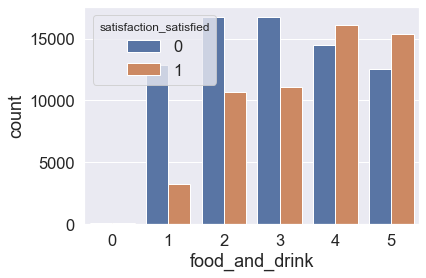

In [117]:
seaborn.countplot(data = org_data, x = features[6], hue='satisfaction_satisfied')

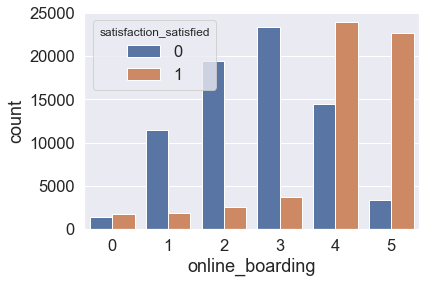

In [118]:
seaborn.countplot(data = org_data, x = features[7], hue='satisfaction_satisfied')

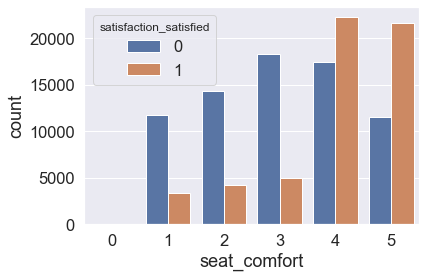

In [119]:
seaborn.countplot(data = org_data, x = features[8], hue='satisfaction_satisfied')

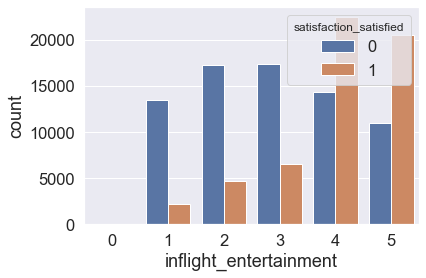

In [120]:
seaborn.countplot(data = org_data, x = features[9], hue='satisfaction_satisfied')

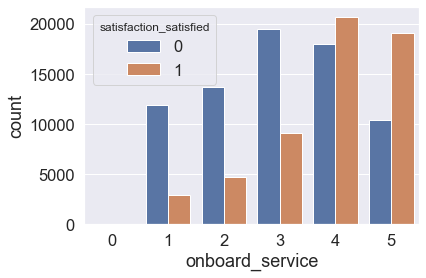

In [121]:
seaborn.countplot(data = org_data, x = features[10], hue='satisfaction_satisfied')

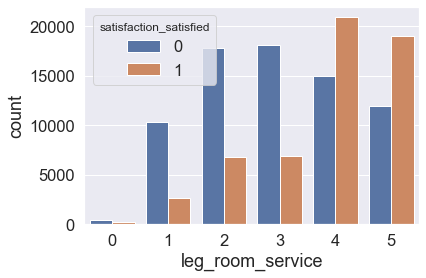

In [122]:
seaborn.countplot(data = org_data, x = features[11], hue='satisfaction_satisfied')

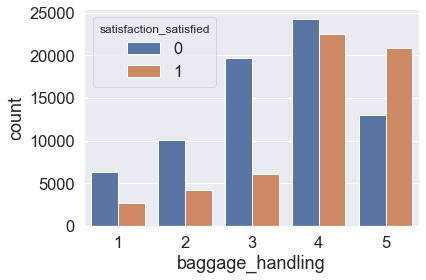

In [123]:
seaborn.countplot(data = org_data, x = features[12], hue='satisfaction_satisfied')

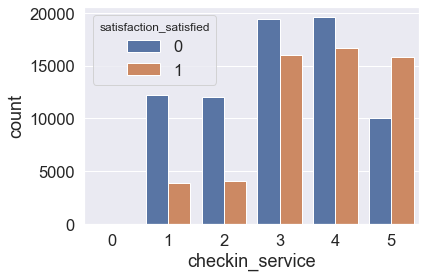

In [124]:
seaborn.countplot(data = org_data, x = features[13], hue='satisfaction_satisfied')

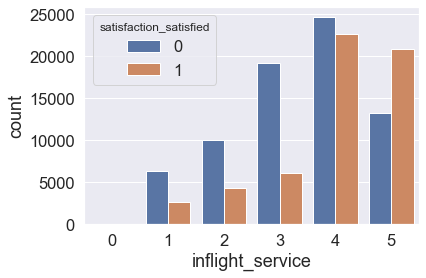

In [9]:
seaborn.countplot(data = org_data, x = features[14], hue='satisfaction_satisfied')

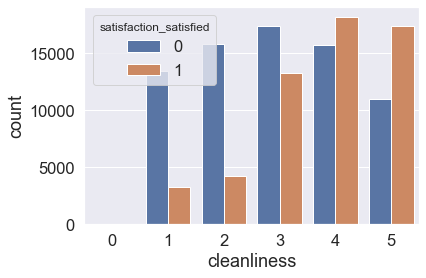

In [10]:
seaborn.countplot(data = org_data, x = features[15], hue='satisfaction_satisfied')

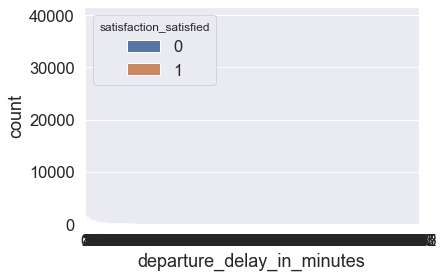

In [11]:
seaborn.countplot(data = org_data, x = features[16], hue='satisfaction_satisfied')

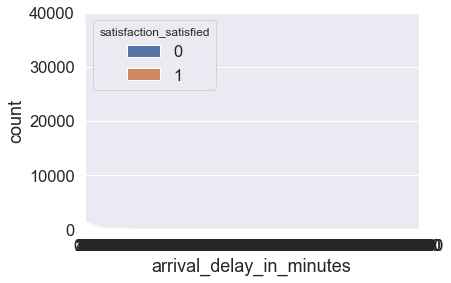

In [12]:
seaborn.countplot(data = org_data, x = features[17], hue='satisfaction_satisfied')

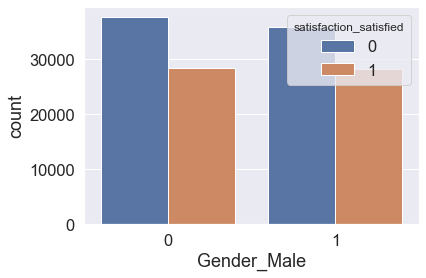

In [13]:
seaborn.countplot(data = org_data, x = features[18], hue='satisfaction_satisfied')

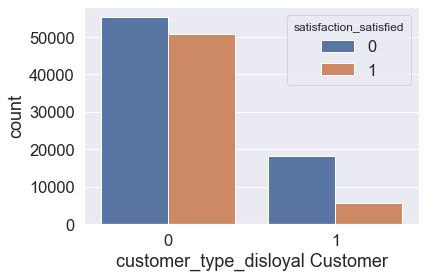

In [14]:
seaborn.countplot(data = org_data, x = features[19], hue='satisfaction_satisfied')

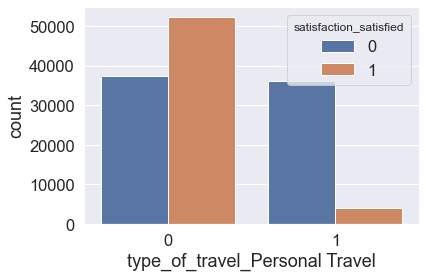

In [15]:
seaborn.countplot(data = org_data, x = features[20], hue='satisfaction_satisfied')

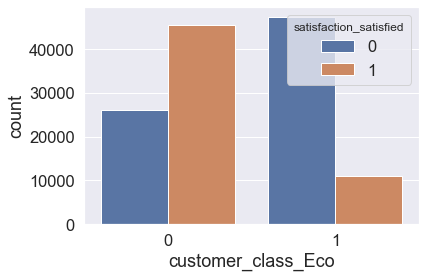

In [16]:
seaborn.countplot(data = org_data, x = features[21], hue='satisfaction_satisfied')

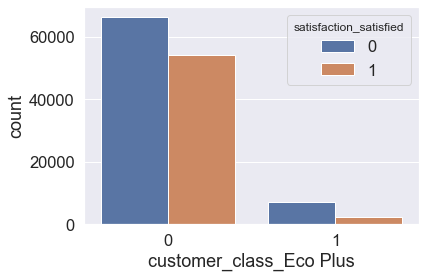

In [17]:
seaborn.countplot(data = org_data, x = features[22], hue='satisfaction_satisfied')

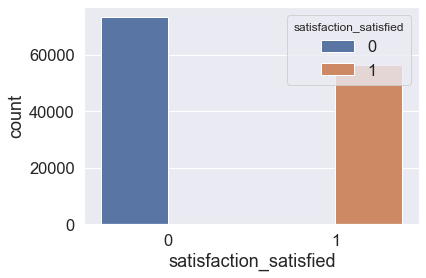

In [18]:
seaborn.countplot(data = org_data, x = features[23], hue='satisfaction_satisfied')

### 1.5 Outliers

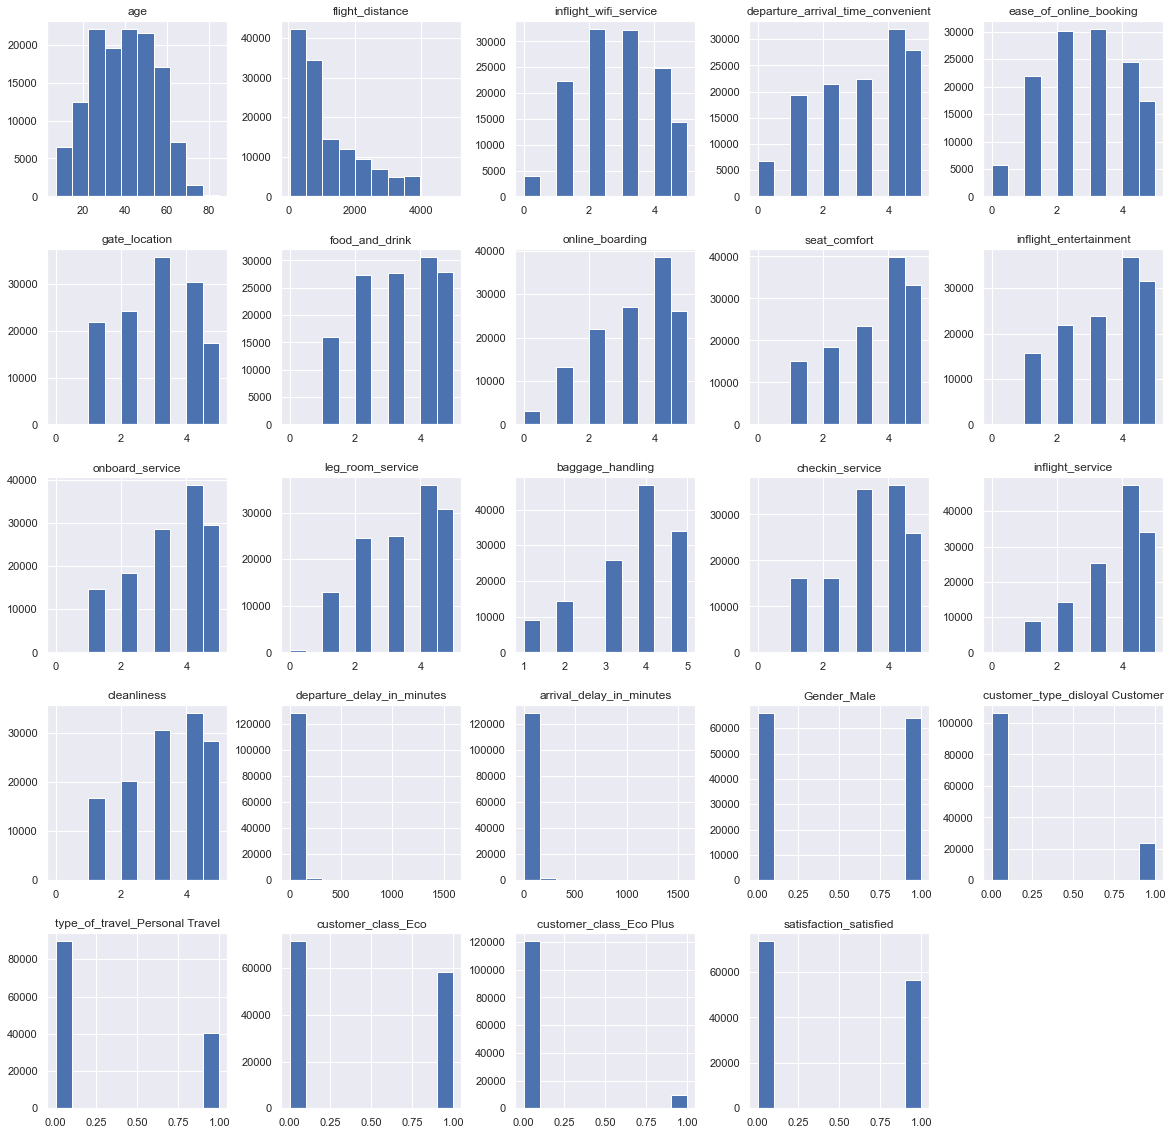

In [45]:
org_data.hist(figsize=(20,20))
plt.show()

#### we can see from above, "flight_distance", "arrival_delay_in_minutes" and "departure_delay_in_minutes"  may have outliers
#### Lets take a closer look at scatter plots below:

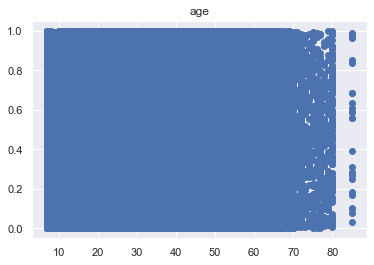

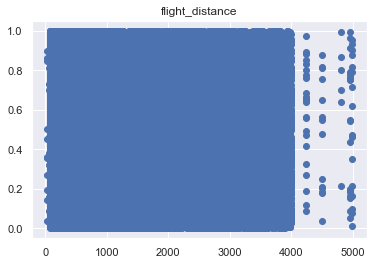

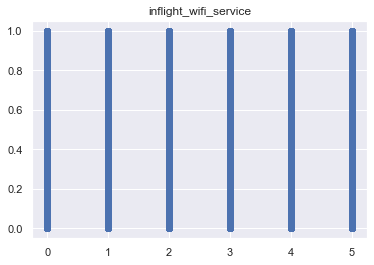

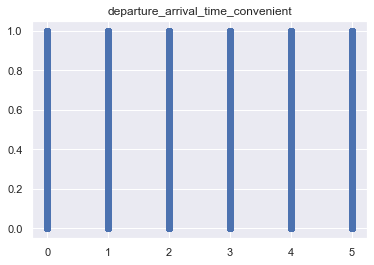

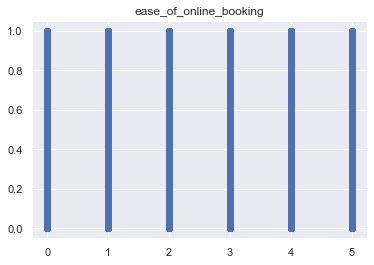

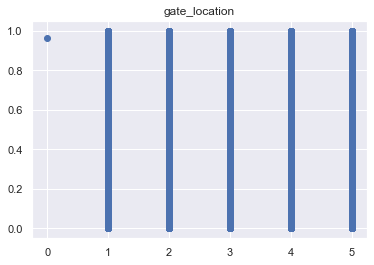

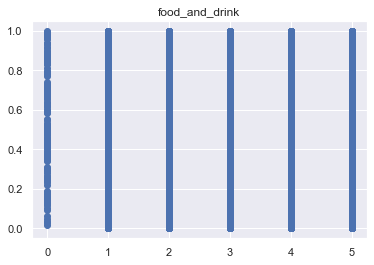

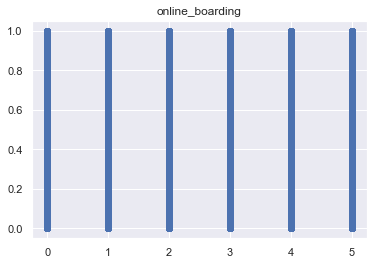

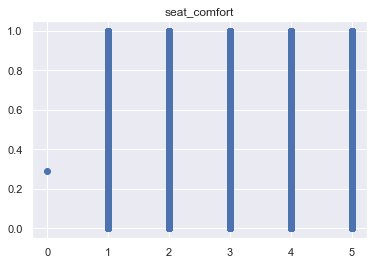

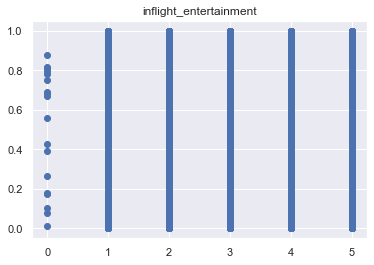

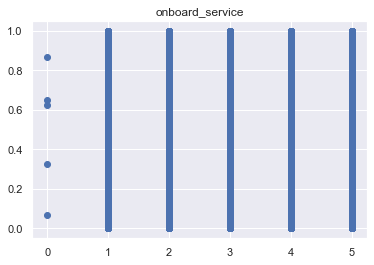

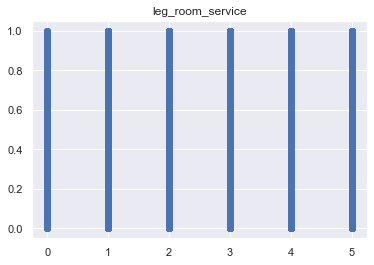

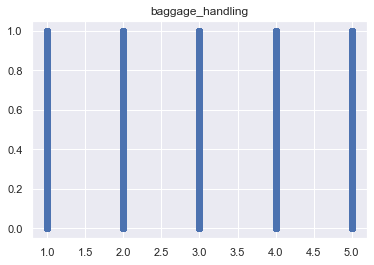

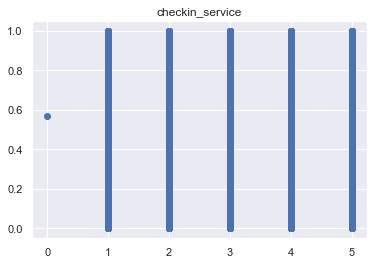

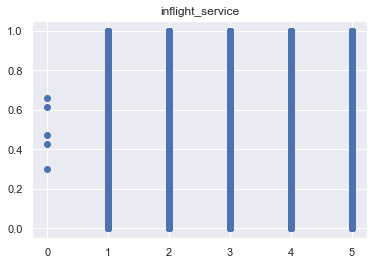

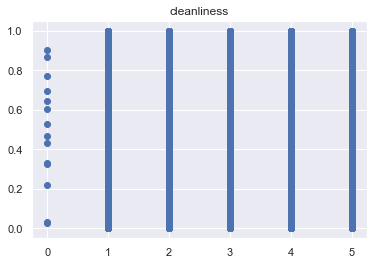

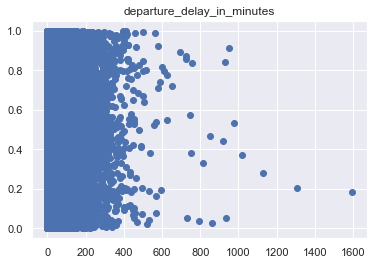

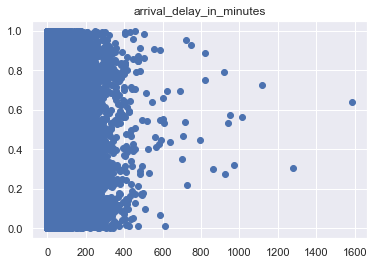

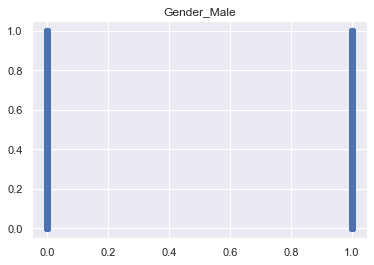

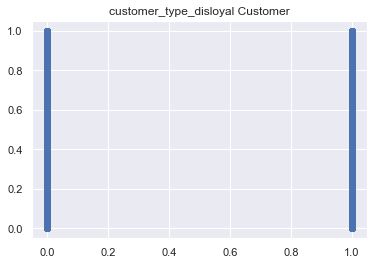

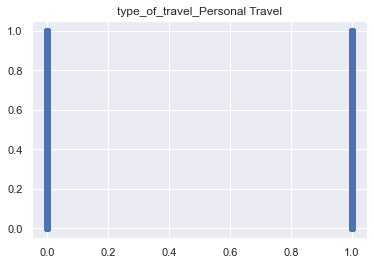

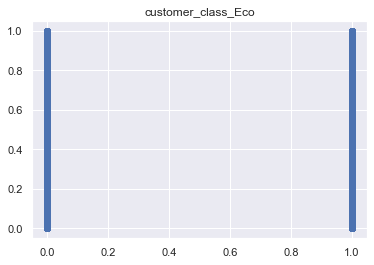

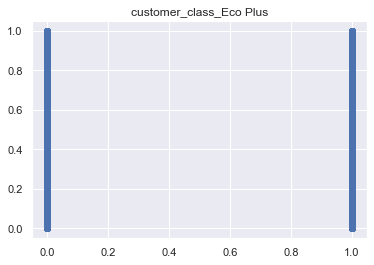

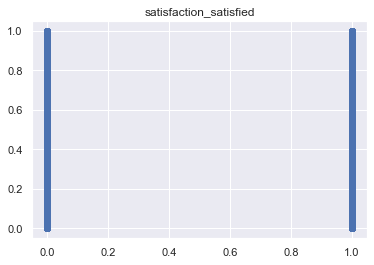

In [117]:
for i , feat in enumerate(features):

    plt.scatter (org_data[feat], np.random.rand(len(org_data)))
    plt.title(feat)
    plt.show()

#### Outliers removal

In [5]:
#### After checking scatter plots, we do need to remove some outliers for the following features:
#### "flight_distance" :             remove values > 5000
#### "arrival_delay_in_minutes" :    remove values > 450
#### "departure_delay_in_minutes":   remove values > 450
data = org_data[(org_data['flight_distance'] <= 4000)]
data = org_data[(org_data['departure_delay_in_minutes'] <= 450)]
data = org_data[(org_data['arrival_delay_in_minutes'] <= 450)]


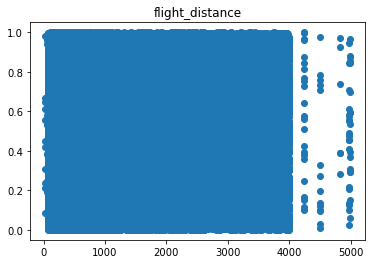

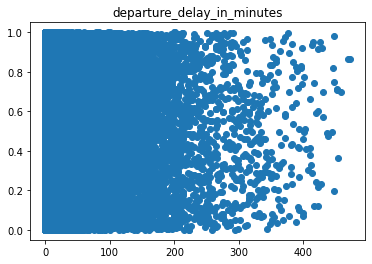

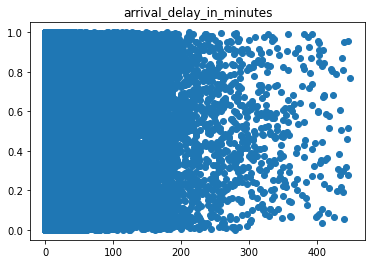

(129816, 24)

In [7]:
# let's verify
for i , feat in enumerate(['flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes' ]):
    plt.scatter (data[feat], np.random.rand(len(data)))
    plt.title(feat)
    plt.show()
data.shape

### 1.6 Train Test Split 1
#### dataset --> train & test with ratio 8:2

In [6]:
#Get the features and label

x = data.drop('satisfaction_satisfied', axis=1)
y = data['satisfaction_satisfied']
print('x: ', x.shape)
print('y: ', y.shape)

x:  (129816, 23)
y:  (129816,)


In [7]:
# First Split dataset into train and test with ratio 8:2
train_x, x_test, train_y, y_test = train_test_split(x.values, y.values, test_size = 0.2, random_state = 42)
print('train_x: ', train_x.shape)
print('x_test: ', x_test.shape)

train_x:  (103852, 23)
x_test:  (25964, 23)


### 1.7. Normalize the features


In [8]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
x_test = scaler.fit_transform(x_test)

### 1.8 PCA

In [9]:
pca = PCA(n_components = 0.85)
train_x_pca = pca.fit_transform(train_x)
x_test_pca = pca.fit_transform(x_test)
print('After PCA, the shape of train set:', train_x_pca.shape)
print('After PCA, the shape of test set:', x_test_pca.shape)

After PCA, the shape of train set: (103852, 13)
After PCA, the shape of test set: (25964, 13)


### 1.8 Train/Pre_train Test Split 2
    1. Leave Test set unchanged 
    2. Split Train set into pre_train and train with a ratio 2:6, which is 1/3
    3. pre_train set is used for model selection over 6 different models, then select the best 2 models to tune
    4. train set is used after step 3, which is used to fine tune the best 2 models

In [10]:
#Split
x_train, x_preTrain, y_train, y_preTrain = train_test_split(train_x_pca, train_y, test_size = 1/3, random_state = 42)
print('x_train: ', x_train.shape)
print('x_preTrain: ', x_preTrain.shape)

x_train:  (69234, 13)
x_preTrain:  (34618, 13)


## 2. Machine Learning Models

### 2.0 Trival System

In [61]:
#We use training set label counts as the probability to assign the labels 
label_list = [0, 1]
weight_list = [0.5,0.5]

def trival_sys(input_data):
    output_label_list = []
    for i in range(len(input_data)):
        output_label = random.choices(label_list, weights = weight_list, k = 1)
        output_label_list = np.append(output_label_list, output_label)
    return output_label_list

y_test_pred_trival = trival_sys(x_test_pca)
acc_trival = accuracy_score(y_test_pred_trival, y_test)
print('Trival sys test accuracy: ', acc_trival)

Trival sys test accuracy:  0.5012709906023726


### 2.1 Compare 6 models with default pram

In [28]:
def pre_model_comparassion(x, y, models):
    
    accuracy_list = []
    
    for m in models:
        cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
        scores = cross_val_score(m, x, y, scoring = 'accuracy', cv = cv)
        accuracy = np.mean(scores)
        accuracy_list.append(accuracy)
    return accuracy_list

##### Note: I choose the following 6 Classifiers for Pre Model Comparassion
     1.LogisticRegression
     2.SVC
     3.KNeighborsClassifier
     4.DecisionTreeClassifier
     5.AdaBoostClassifier
     6.RandomForestClassifier

In [29]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), 
          DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier()]

accuracy_list = pre_model_comparassion(x_preTrain, y_preTrain, models)

#### Show some plot and results for comparassion 

,Models,Accuracy
0,LogisticRegression(),0.860506
1,SVC(),0.928014
2,KNeighborsClassifier(),0.911491
3,DecisionTreeClassifier(),0.869721
4,AdaBoostClassifier(),0.871541
5,RandomForestClassifier(),0.917760


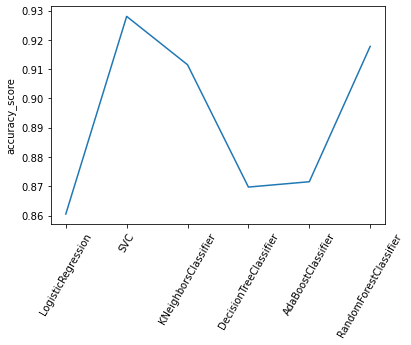

In [30]:
models_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 
          'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier']
model_df = pd.DataFrame({'Models': models, 'Accuracy':accuracy_list})


plt.plot(accuracy_list)
plt.ylabel('accuracy_score')
plt.xticks([0, 1, 2,3,4,5],models_name, rotation = 60)
model_df

#### After previous, I found out the best 2 models are SVC and Random Forest

### 2.2 SVC and Hyperprameter tuning

In [18]:
# I am using GridSearchCV for tuning 
# x_preTrain has a shape of (34618, 13)
# Using all 34618 x 13 data points to run GridSearchCV will take more than 2h
# So I choose to use 1/4 of x_preTrain for Hyperprameter tuning 
# The data used to tune is called x_train_tune and y_train_tune
x_train_left, x_train_tune, y_train_left, y_train_tune = train_test_split(x_preTrain, y_preTrain, test_size = 1/4, random_state = 42)
print('x_train_tune: ', x_train_tune.shape)
print('y_train_tune',y_train_tune.shape)
print(' ')
print('x_train_left: ', x_train_left.shape)
print('y_train_left', y_train_left.shape)

x_train_tune:  (8655, 13)
y_train_tune (8655,)
 
x_train_left:  (25963, 13)
y_train_left (25963,)


In [19]:

# reference: geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
param_grid = {'C': [0.05,0.1,0.5,1,10],
             'gamma': [1,0.5,0.1,0.01,0.001],
             'kernel':['rbf']}
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, scoring = 'accuracy')
grid_svc.fit(x_train_tune, y_train_tune)
print('Best Hyperprameters after tuning(Based on preTrain data set):',grid_svc.best_params_)

Best Hyperprameters after tuning(Based on preTrain data set): {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [22]:
# Let's verify if the tunning increase the accuracy on preTrain set
# The default parameters give a accuracy of 0.946935
svc_pre = SVC(kernel = 'rbf', gamma =0.1 , C=1)
svc_pre.fit(x_preTrain, y_preTrain)
y_preTrain_pred = svc_pre.predict(x_preTrain)
svc_pre_train_acc = accuracy_score(y_preTrain,y_preTrain_pred)
print('Before tuning, accuracy = 0.928014')
print('After tuning, accuracy = ', svc_pre_train_acc)
print('Improvement: ', (svc_pre_train_acc -0.928014)/0.928014)

Before tuning, accuracy = 0.928014
After tuning, accuracy =  0.9445375238315328
Improvement:  0.017805252756459247


In [24]:
# Then We use the best parameters to finalize our model
svc_model=SVC(kernel = 'rbf', gamma =0.1 , C=1)
svc_model.fit(x_train, y_train)

y_train_pred = svc_model.predict(x_train)
y_test_pred = svc_model.predict(x_test_pca)

svc_train_acc = accuracy_score(y_train, y_train_pred)
svc_test_acc = accuracy_score(y_test, y_test_pred)

print('SVC Training Accuracy: ' , svc_train_acc)
print('SVC Test Accuracy: ', svc_test_acc )

SVC Training Accuracy:  0.9430626570760031
SVC Test Accuracy:  0.8796410414419966


### 2.3 Random Forest and Hyperprameter tunning

In [30]:
# I also use GridSearchCV for tuning 
# Same situation here: to reduce runtime, so I choose to use 1/4 of x_preTrain for Hyperprameter tuning 
# The data used to tune is called x_train_tune and y_train_tune
param_grid_RF = {
    'bootstrap': [True],
    'max_depth': [5, 10, 50, 100],
    'max_features': [2, 4, 6],
    'n_estimators': [100, 200, 300]
}

grid_RF = GridSearchCV(RandomForestClassifier(),param_grid_RF, refit = True, scoring = 'accuracy')
grid_RF.fit(x_train_tune, y_train_tune)
print('Best Hyperprameters after tuning(Based on preTrain data set):',grid_RF.best_params_)

Best Hyperprameters after tuning(Based on preTrain data set): {'bootstrap': True, 'max_depth': 50, 'max_features': 6, 'n_estimators': 100}


In [31]:
# Let's verify if the tunning increase the accuracy on preTrain set
# The default parameters give a accuracy of 0.956497
RF_pre = RandomForestClassifier(n_estimators=100, max_depth=50, max_features=6, bootstrap= True)
RF_pre.fit(x_preTrain, y_preTrain)
y_preTrain_pred = RF_pre.predict(x_preTrain)
RF_pre_train_acc = accuracy_score(y_preTrain,y_preTrain_pred)
print('Before tuning, accuracy = 0.917760')
print('After tuning, accuracy = ', RF_pre_train_acc)
print('Improvement: ', (RF_pre_train_acc -0.917760)/0.917760)

Before tuning, accuracy = 0.917760
After tuning, accuracy =  1.0
Improvement:  0.08960948396094837


In [29]:
# Then We use the best parameters to finalize our model
RF_model=RandomForestClassifier(n_estimators=100, max_depth=50, max_features=6, bootstrap= True)
RF_model.fit(x_train, y_train)

y_train_pred = RF_model.predict(x_train)
y_test_pred = RF_model.predict(x_test_pca)

RF_train_acc = accuracy_score(y_train, y_train_pred)
RF_test_acc = accuracy_score(y_test, y_test_pred)

print('RF Training Accuracy: ' , RF_train_acc)
print('RF Test Accuracy: ', RF_test_acc )

RF Training Accuracy:  0.9999855562295982
RF Test Accuracy:  0.9010938222153752


In [38]:
RF_model.feature_importances_

array([0.37222178, 0.10889023, 0.03808818, 0.0468296 , 0.13501453,
       0.08331977, 0.03396086, 0.02336743, 0.03726279, 0.0288797 ,
       0.0361474 , 0.02597438, 0.03004337])

## 3. SSL

### 3.1 Form SSL dataset

In [27]:

# Test Set
X_test = x_test_pca
Y_test = y_test
print('Test Set')
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)
print('')

#Original Train set with all the label
X_train = train_x_pca
Y_train = train_y
print('Original Train set with all the label')
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('')

#Pre_Train set with all the label
X_preTrain = x_preTrain
Y_preTrain = y_preTrain
print('Pre_Train set with all the label')
print('X_preTrain:', X_preTrain.shape)
print('Y_preTrain:', Y_preTrain.shape)
print('')

#Since preTrain set has 34618 x 13 data points, still too large for SSL
# I cut it by half to form X and X_left set
X, X_left, Y, Y_left = train_test_split(X_preTrain, Y_preTrain, test_size = 1/2, random_state = 42)
print('The dataset used to form labeled + unlabeled sets')
print('X: ', X.shape)
print('Y: ', Y.shape)
print('')


#Use preTrain set to set Labeled train : Unlabeled train = 1:1
X_train_L, X_train_U, Y_train_L, Y_train_U =train_test_split(X, Y, test_size = 1/2, random_state = 42)
print('Labeled train : Unlabeled train = 1:1')
print('X_train_L:', X_train_L.shape)
print('Y_train_L:',Y_train_L.shape)
print('')
print('X_train_U', X_train_U.shape)
print('Y_train_U', Y_train_U.shape, '(Do not use this label)')


Test Set
X_test: (25964, 13)
Y_test: (25964,)

Original Train set with all the label
X_train: (103852, 13)
Y_train: (103852,)

Pre_Train set with all the label
X_preTrain: (34618, 13)
Y_preTrain: (34618,)

The dataset used to form labeled + unlabeled sets
X:  (17309, 13)
Y:  (17309,)

Labeled train : Unlabeled train = 1:1
X_train_L: (8654, 13)
Y_train_L: (8654,)

X_train_U (8655, 13)
Y_train_U (8655,) (Do not use this label)


### 3.2 Estabilish a baseline sys
      1. using SL to fit only on the labeled training data
      2. would expect a SSL to outperform a SL 

In [36]:
# Define the model
baseline = LogisticRegression()
baseline.fit(X, Y)

#make first prediction on the test set
Y_pred = baseline.predict(X_test)
acc_base = accuracy_score(Y_test, Y_pred)
print('BaseLine model accuracy: ',acc_base )

BaseLine model accuracy:  0.8437451856416577


### 3.3 Create Train_mix set and set all the unlabeled labels to -1

In [29]:
# Note: unlabeled examples marked with a label of -1.

#Concatenate the labeled and unlabeled data
X_train_mix = np.concatenate((X_train_L, X_train_U))

#encode -1 for unlabeled set
u_label = [-1 for _ in range(len(Y_train_U))]

#Concatenate u_label with labeled set to form the training set
Y_train_mix = np.concatenate((Y_train_L, u_label))

print('X_train_mix: ',X_train_mix.shape)
print('Y_train_mix:', Y_train_mix.shape)


X_train_mix:  (17309, 13)
Y_train_mix: (17309,)


### 3.4 Label Propagation for Semi-Supervised Learning

In [30]:
#Train LabelPropagation model 
ssl = LabelPropagation()
ssl.fit(X_train_mix, Y_train_mix)

LabelPropagation()

In [31]:
#make prediction 
Y_pred = ssl.predict(X_test)
acc_ssl = accuracy_score(Y_test, Y_pred)
print('SSL model accuracy: ', acc_ssl)

SSL model accuracy:  0.8400862733014943


### 3.5 Label Spreading for Semi-Supervised Learning

In [32]:
ssl_LS = LabelSpreading()
ssl_LS.fit(X_train_mix, Y_train_mix)

#Make prediction 
Y_pred = ssl.predict(X_test)
acc_LS = accuracy_score(Y_test, Y_pred)
print('SSL model accuracy: ', acc_LS)

SSL model accuracy:  0.8400862733014943


### 3.6 SelfTraining for Semi-Supervised Learning

In [33]:
svc = SVC(probability = True, gamma = "auto")
self_training = SelfTrainingClassifier(svc)
self_training.fit(X_train_mix, Y_train_mix)

#Make prediction 
Y_pred = self_training.predict(X_test)
acc_ST = accuracy_score(Y_test, Y_pred)
print('Self Training model accuracy: ', acc_ST)

Self Training model accuracy:  0.8782159913726698


### 3.7 Futher Research 

    Lets use the estimated labels from SSL model to fit a supervised learning model
    Compare the accuracy to see if the SL model will achive a even better performance

### 3.7.1 Combine LabelPropagation with SL

In [40]:
# Obtain the estimated labels from SSL model 1: SSL_LabelPropagation
estimated_label = ssl.transduction_
combined_SL = LogisticRegression()
combined_SL.fit(X_train_mix, estimated_label)
Y_pred = combined_SL.predict(X_test)
acc_combined_LP = accuracy_score(Y_test, Y_pred)
print('Combined model accuracy(LabelPropagation + SL): ', acc_combined_LP)

Combined model accuracy(LabelPropagation + SL):  0.8454398397781544


### 3.7.2 Combine LabelSpreading with SL

In [41]:
# Obtain the estimated labels from SSL model 2: SSL_LabelSpreading
estimated_label = ssl_LS.transduction_
combined_SL = LogisticRegression()
combined_SL.fit(X_train_mix, estimated_label)
Y_pred = combined_SL.predict(X_test)
acc_combined_LS = accuracy_score(Y_test, Y_pred)
print('Combined model accuracy(LabelPropagation + SL): ', acc_combined_LS)

Combined model accuracy(LabelPropagation + SL):  0.8456709289785858


### 3.7.3 Combine SelfTraining with SL

In [42]:
# Obtain the estimated labels from SSL model 3: SSL_SelfTraining
estimated_label = self_training.transduction_
combined_SL = LogisticRegression()
combined_SL.fit(X_train_mix, estimated_label)
Y_pred = combined_SL.predict(X_test)
acc_combined_ST = accuracy_score(Y_test, Y_pred)
print('Combined model accuracy(LabelPropagation + SL): ', acc_combined_ST)

Combined model accuracy(LabelPropagation + SL):  0.8464027114466184


### 3.7.4 Create plot for compare

,Models,Accuracy
0,LogisticRegression(base SL),0.843745
1,Label Propagation(SSL),0.840086
2,Label Spreading(SSL),0.840086
3,Self Training(SSL),0.878216
4,Label Propagation + SL,0.845440
5,Label Spreading + SL,0.845671
6,Self Training + SL,0.846403


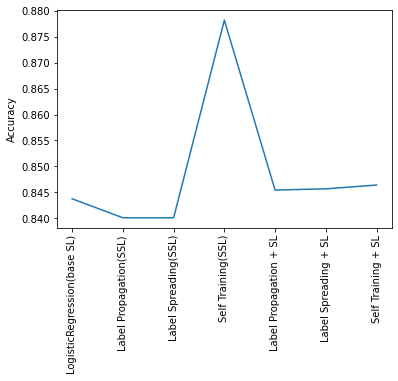

In [52]:
models_name = ['LogisticRegression(base SL)', 'Label Propagation(SSL)', 'Label Spreading(SSL)', 
          'Self Training(SSL)', 'Label Propagation + SL', 'Label Spreading + SL','Self Training + SL']
accuracy_list = [acc_base, acc_ssl, acc_LS, acc_ST, acc_combined_LP, acc_combined_LS, acc_combined_ST]
model_df = pd.DataFrame({'Models': models_name, 'Accuracy':accuracy_list})


plt.plot(accuracy_list)
plt.ylabel('Accuracy')
plt.xticks([0, 1, 2,3,4,5,6],models_name, rotation = 90)
model_df